In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용



--- 
 - 소프트맥스 회귀 구현하기 
   - 이번 챕터에서는 소프트맥스 회귀를 로우-레벨과 F.cross_entropy를 사용해서 구현해보겠습니다. 


--- 
 - 소프트맥스 회귀 구현하기(로우-레벨) 



x_train : 
    torch.Size([8, 4]) tensor([[1., 2., 1., 1.],
            [2., 1., 3., 2.],
            [3., 1., 3., 4.],
            [4., 1., 5., 5.],
            [1., 7., 5., 5.],
            [1., 2., 5., 6.],
            [1., 6., 6., 6.],
            [1., 7., 7., 7.]])

y_train : 
    torch.Size([8]) tensor([2, 2, 2, 1, 1, 1, 0, 0])

y_one_hot : 
    torch.Size([8, 3]) tensor([[0., 0., 1.],
            [0., 0., 1.],
            [0., 0., 1.],
            [0., 1., 0.],
            [0., 1., 0.],
            [0., 1., 0.],
            [1., 0., 0.],
            [1., 0., 0.]])

-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 8.788898 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 11.492296 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 35.407791 

-------------------------------------------------------------

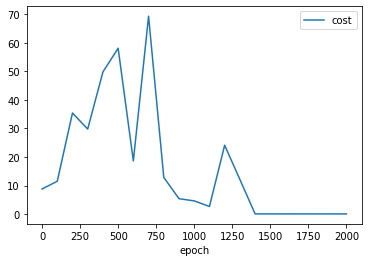

In [2]:

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [2, 2, 2, 1, 1, 1, 0, 0]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

mu.log("x_train", x_train)
mu.log("y_train", y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(dim=1, index=y_train.unsqueeze(dim=1), value=1)
mu.log("y_one_hot", y_one_hot)

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    cost = (y_one_hot * -torch.log(hypothesis)).sum().mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epoches, cost)

mu.plt_show()



--- 
 - 소프트맥스 회귀 구현하기(하이-레벨) 
   - 이제는 F.cross_entropy()를 사용하여 비용 함수를 구현해보겠습니다. 
   - 주의할 점은 F.cross_entropy()는 그 자체로 소프트맥스 함수를 포함하고 있으므로 
   - 가설에서는 소프트맥스 함수를 사용할 필요가 없습니다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 1.098612 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.761050 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.689991 

-------------------------------------------------------------------------------- 
epoch :  300/2000 
cost : 0.643229 

-------------------------------------------------------------------------------- 
epoch :  400/2000 
cost : 0.604117 

-------------------------------------------------------------------------------- 
epoch :  500/2000 
cost : 0.568255 

-------------------------------------------------------------------------------- 
epoch :  600/2000 
cost : 0.533922 

-------------------------------------------------------------------------------- 
epoch :  700/2000 
cost : 0.500291 

------------------------------------------------

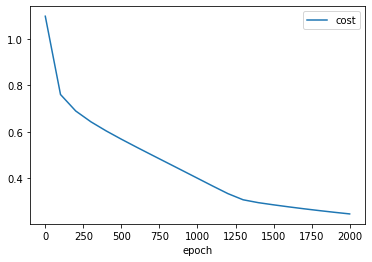

In [3]:


W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W, b], lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epoches, cost)

mu.plt_show()



--- 
 - 소프트맥스 회귀 nn.Module로 구현하기 
   - 이번에는 nn.Module로 소프트맥스 회귀를 구현해봅시다. 
   - 선형 회귀에서 구현에 사용했던 nn.Linear()를 사용합니다. 
   - output_dim이 1이었던 선형 회귀때와 달리 output_dim은 이제 클래스의 개수여야 합니다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 1.616785 
model : 
    Linear(in_features=4, out_features=3, bias=True)  
    torch.Size([3, 4]) tensor([[ 0.2045, -0.1141, -0.0567,  0.2687], 
            [-0.4421,  0.2092, -0.1277,  0.2381], 
            [ 0.0940, -0.0772,  0.1233,  0.0070]]) 
    torch.Size([3]) tensor([ 0.1748, -0.1983, -0.0251]) 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.658891 
model : 
    Linear(in_features=4, out_features=3, bias=True)  
    torch.Size([3, 4]) tensor([[-1.0188,  0.2000,  0.2493,  0.2798], 
            [-0.0874, -0.3081, -0.0470,  0.5424], 
            [ 0.9626,  0.1260, -0.2635, -0.3084]]) 
    torch.Size([3]) tensor([-0.4365, -0.4092,  0.7970]) 

-------------------------------------------------------------------------------- 
epoch :  200/2000 
cost : 0.573443 
model : 
    Linear(in_features=4, out_features=3, bias=

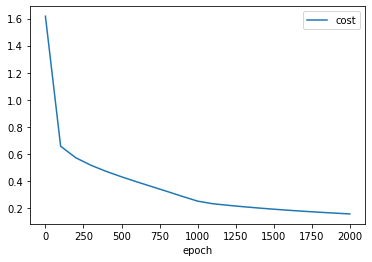

In [4]:


model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epoches, cost, model=model)

mu.plt_show()




--- 
 - 소프트맥스 회귀 클래스로 구현하기 
   - 이제 소프트맥스 회귀를 nn.Module을 상속받은 클래스로 구현해봅시다. 


-------------------------------------------------------------------------------- 
epoch :    0/2000 
cost : 2.637636 
model : 
    SoftmaxClassificationModel( 
      (linear): Linear(in_features=4, out_features=3, bias=True) 
    )  
    torch.Size([3, 4]) tensor([[-0.1557, -0.0555, -0.2038,  0.2242], 
            [ 0.2267, -0.0648, -0.1194,  0.1115], 
            [-0.1760, -0.1536,  0.0432,  0.3156]]) 
    torch.Size([3]) tensor([ 0.2178, -0.4535,  0.3287]) 

-------------------------------------------------------------------------------- 
epoch :  100/2000 
cost : 0.647903 
model : 
    SoftmaxClassificationModel( 
      (linear): Linear(in_features=4, out_features=3, bias=True) 
    )  
    torch.Size([3, 4]) tensor([[-1.0700,  0.1371,  0.1811,  0.2893], 
            [ 0.0951, -0.3527, -0.0752,  0.5131], 
            [ 0.8699, -0.0583, -0.3860, -0.1511]]) 
    torch.Size([3]) tensor([-0.3302, -0.7088,  1.1320]) 

----------------------------------------------------------------------

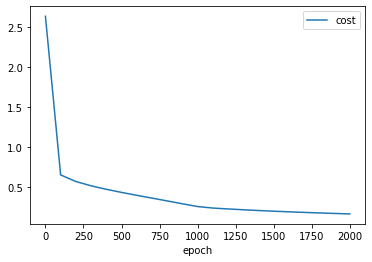

In [5]:


class SoftmaxClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        res = self.linear(x)
        return res


model = SoftmaxClassificationModel()
optimizer = optim.SGD(model.parameters(), lr=0.1)
nb_epoches = 2000
mu.plt_init()

for epoch in range(nb_epoches + 1):
    prediction = model(x_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epoches, cost, model=model)

mu.plt_show()
